In [1]:
import pandas as pd
import numpy as np
import pdfplumber
import re
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

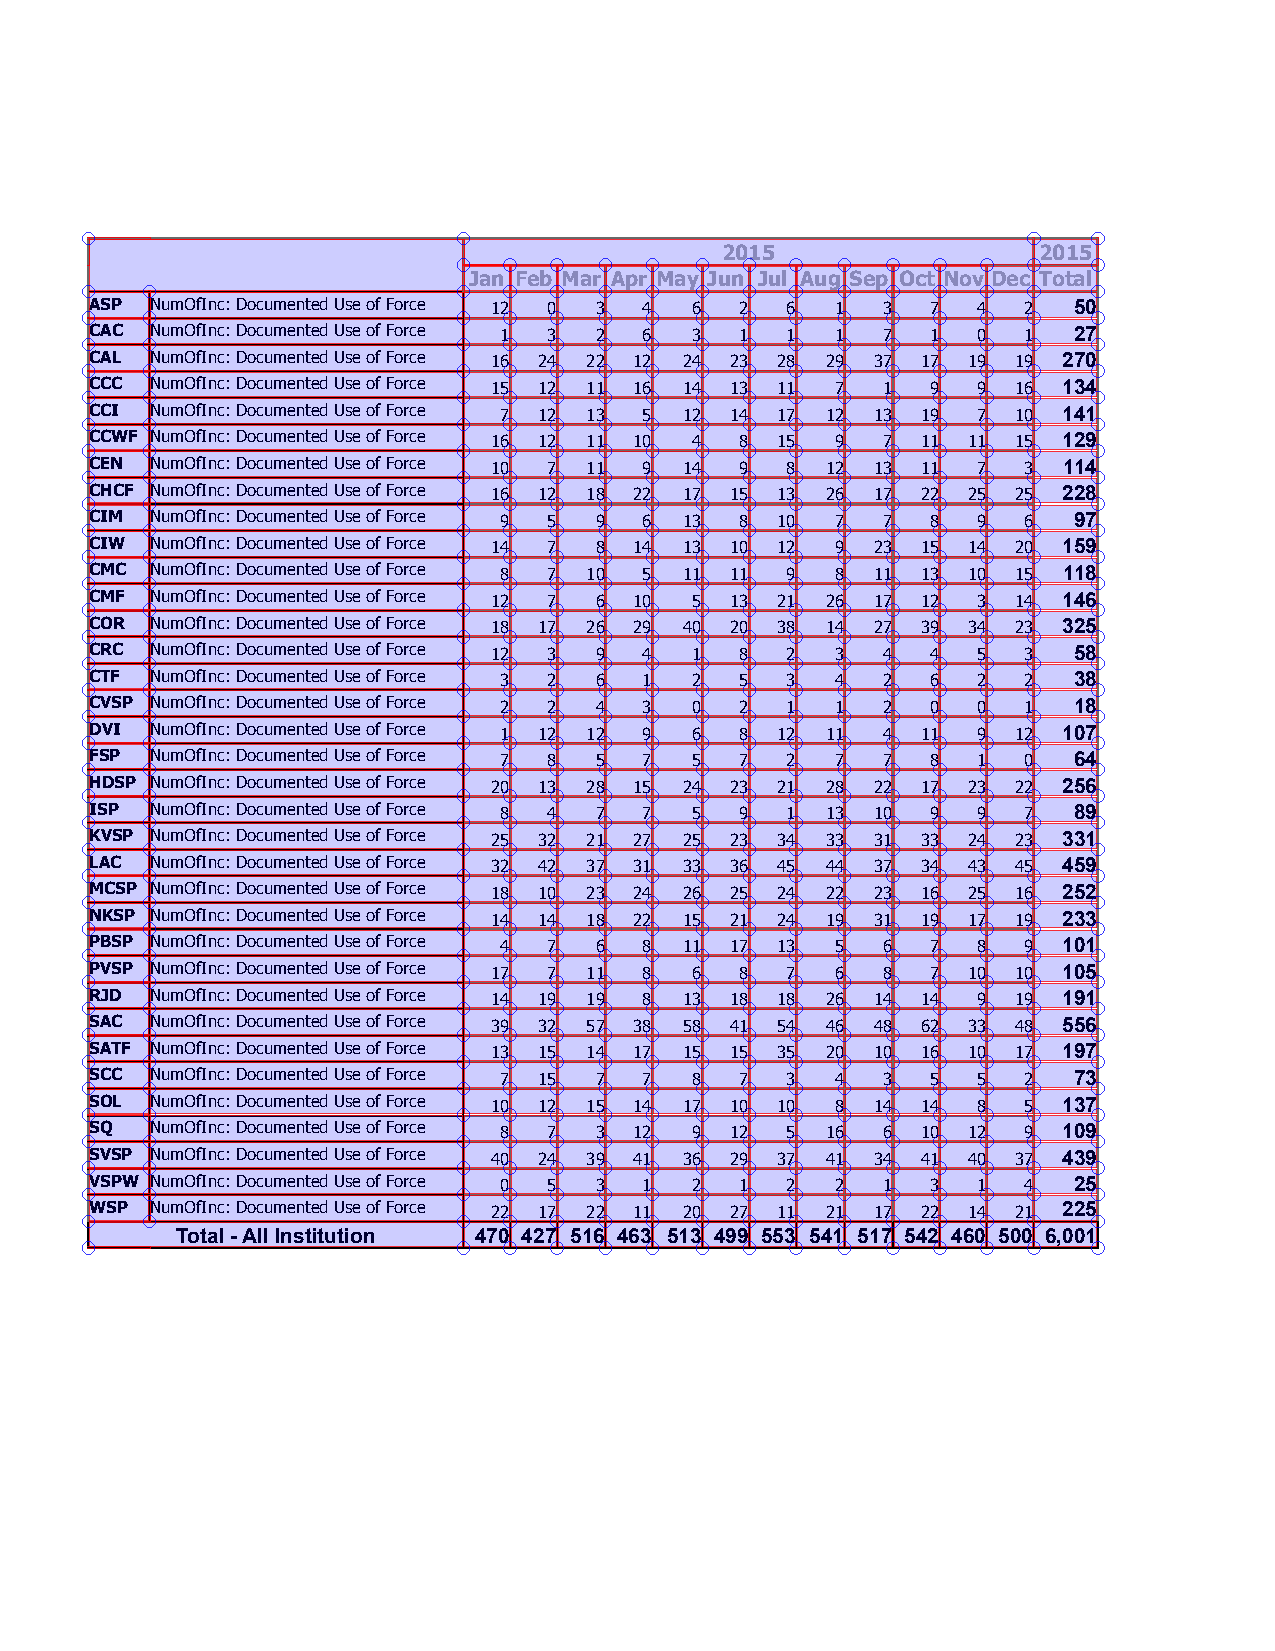

In [3]:
#test first page
pdf = pdfplumber.open("pdfs-2015-to-2019 (UOF)/2015-UOF-COMPSTAT.pdf")
page = pdf.pages[0]
im = page.to_image(resolution=150)
im.reset().debug_tablefinder()

In [4]:
page.extract_table()

[['',
  None,
  '2015',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  '2015'],
 [None,
  None,
  'Jan',
  'Feb',
  'Mar',
  'Apr',
  'May',
  'Jun',
  'Jul',
  'Aug',
  'Sep',
  'Oct',
  'Nov',
  'Dec',
  'Total'],
 ['ASP',
  'NumOfInc: Documented Use of Force',
  '12',
  '0',
  '3',
  '4',
  '6',
  '2',
  '6',
  '1',
  '3',
  '7',
  '4',
  '2',
  '50'],
 ['CAC',
  'NumOfInc: Documented Use of Force',
  '1',
  '3',
  '2',
  '6',
  '3',
  '1',
  '1',
  '1',
  '7',
  '1',
  '0',
  '1',
  '27'],
 ['CAL',
  'NumOfInc: Documented Use of Force',
  '16',
  '24',
  '22',
  '12',
  '24',
  '23',
  '28',
  '29',
  '37',
  '17',
  '19',
  '19',
  '270'],
 ['CCC',
  'NumOfInc: Documented Use of Force',
  '15',
  '12',
  '11',
  '16',
  '14',
  '13',
  '11',
  '7',
  '1',
  '9',
  '9',
  '16',
  '134'],
 ['CCI',
  'NumOfInc: Documented Use of Force',
  '7',
  '12',
  '13',
  '5',
  '12',
  '14',
  '17',
  '12',
  '13',
  '19',
  '7',
  '10',
  '141'],
 ['

In [26]:
columns = [
  'Institution',
  'Year',
  'Jan',
  'Feb',
  'Mar',
  'Apr',
  'May',
  'Jun',
  'Jul',
  'Aug',
  'Sep',
  'Oct',
  'Nov',
  'Dec'
]

df = pd.DataFrame()

pdf_files = [
    '2015-UOF-COMPSTAT.pdf',
    '2016-UOF-COMPSTAT.pdf',
    '2017-UOF-COMPSTAT.pdf',
    '2018-UOF-COMPSTAT.pdf',
    '2019-UOF-COMPSTAT.pdf'
]

def parse_value(x):
    if x == "": return np.nan
    return x.replace(",", "").replace('\n',' ')
    
def parse_row(row,year):
    row_builder = {columns[i + 2]:parse_value(cell) for i, cell in enumerate(row[2:14])}
    row_builder['Year'] = year
    row_builder['Institution'] = row[0]
    return row_builder

for pdfs in pdf_files:
    pdf   = pdfplumber.open("pdfs-2015-to-2019 (UOF)/" + pdfs)
    page  = pdf.pages[0]
    table = page.extract_table()
    year  = table[0][2]

    data  = [ parse_row(row, year) for row in table[2:37] ]

    df = pd.concat([df, pd.DataFrame(data)], ignore_index=False)

df
    
    

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year,Institution
0,12,0,3,4,6,2,6,1,3,7,4,2,2015,ASP
1,1,3,2,6,3,1,1,1,7,1,0,1,2015,CAC
2,16,24,22,12,24,23,28,29,37,17,19,19,2015,CAL
3,15,12,11,16,14,13,11,7,1,9,9,16,2015,CCC
4,7,12,13,5,12,14,17,12,13,19,7,10,2015,CCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,17,12,10,15,19,15,15,16,20,19,12,24,2019,SOL
31,17,6,7,9,12,13,10,22,22,18,9,7,2019,SQ
32,51,52,53,52,50,59,54,43,57,30,47,49,2019,SVSP
33,4,4,7,3,5,5,2,2,1,2,3,4,2019,VSPW


In [27]:
df_melted = df.melt(id_vars=['Institution', 'Year'], var_name='Month', value_name='Use of Force')
df_melted

,Institution,Year,Month,Use of Force
0,ASP,2015,Jan,12
1,CAC,2015,Jan,1
2,CAL,2015,Jan,16
3,CCC,2015,Jan,15
4,CCI,2015,Jan,7
...,...,...,...,...
2095,SOL,2019,Dec,24
2096,SQ,2019,Dec,7
2097,SVSP,2019,Dec,49
2098,VSPW,2019,Dec,4


In [28]:
df_melted.to_csv("finished-csvs/finished-2015-2019-UOF.csv", encoding="utf-8", index=True)